In [3]:
import pandas as pd #for importing csv
import numpy as np
import matplotlib.pyplot as plt #for plotting EDA
import os #to navigate to csv files
#from plotnine import ggplot, aes, geom_bar, theme_classic, ggtitle, labs
import seaborn as sns

In [10]:
#change directory
print(os.getcwd())
os.chdir(path=f"C:/Users/engli/Documents/Y2S1/NSPC2001/Mini_VinDr_CXR_Dataset/original_dataset/annotations")
print(os.getcwd())

#get list of csvs in dir
print(os.listdir())
csvList = os.listdir()

#printing csvList items
for csv in csvList:
    print(csv)

C:\Users\engli\Documents\Y2S1\NSPC2001\Mini_VinDr_CXR_Dataset\original_dataset\annotations
C:\Users\engli\Documents\Y2S1\NSPC2001\Mini_VinDr_CXR_Dataset\original_dataset\annotations
['annotations_test.csv', 'annotations_train.csv', 'mini_image_labels_test.csv', 'mini_image_labels_train.csv']
annotations_test.csv
annotations_train.csv
mini_image_labels_test.csv
mini_image_labels_train.csv


In [2]:
try:
    annoTest = pd.read_csv("FULL_1024_PAD_annotations/anno_test.csv")
    print(annoTest.to_string())
    annoTrain = pd.read_csv("FULL_1024_PAD_annotations/anno_train.csv")
    print("\n", annoTrain.to_string())
except FileNotFoundError:
    print("File not found, check directory")

                              image_id          class_name       x_min       y_min       x_max       y_max  x_dim  y_dim
0     e0dc2e79105ad93532484e956ef8a71a       Calcification  574.891917  279.941466  626.404112  331.453661   2148   2420
1     e0dc2e79105ad93532484e956ef8a71a        Cardiomegaly  328.257771  554.673173  819.965088  820.039027   2148   2420
2     e0dc2e79105ad93532484e956ef8a71a                 ILD  774.696795  589.014637  874.599234  821.600002   2148   2420
3     e0dc2e79105ad93532484e956ef8a71a        Pneumothorax  227.224062   61.695273  488.164767  215.860134   2148   2420
4     e0dc2e79105ad93532484e956ef8a71a        Pneumothorax  199.456226  208.930859  249.744206  315.031979   2148   2420
5     e0dc2e79105ad93532484e956ef8a71a    Pleural effusion  155.312033  627.180132  330.693051  823.305141   2148   2420
6     e0dc2e79105ad93532484e956ef8a71a         Atelectasis  218.486916  528.174718  271.289803  634.723401   2148   2420
7     e0dc2e79105ad93532484e956e

<Axes: xlabel='rad_id'>

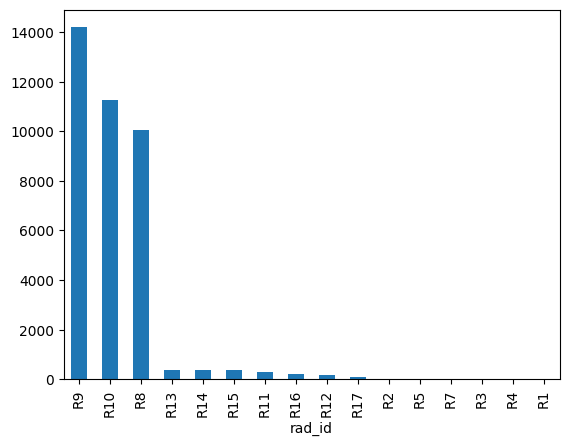

In [6]:
#EDA on radiologists

len(annoTrain)
annoTrain["rad_id"].value_counts().plot(kind = "bar")

#R8, R9, R10 seem to have made the most contributions - what if we focus on the three radiologists?

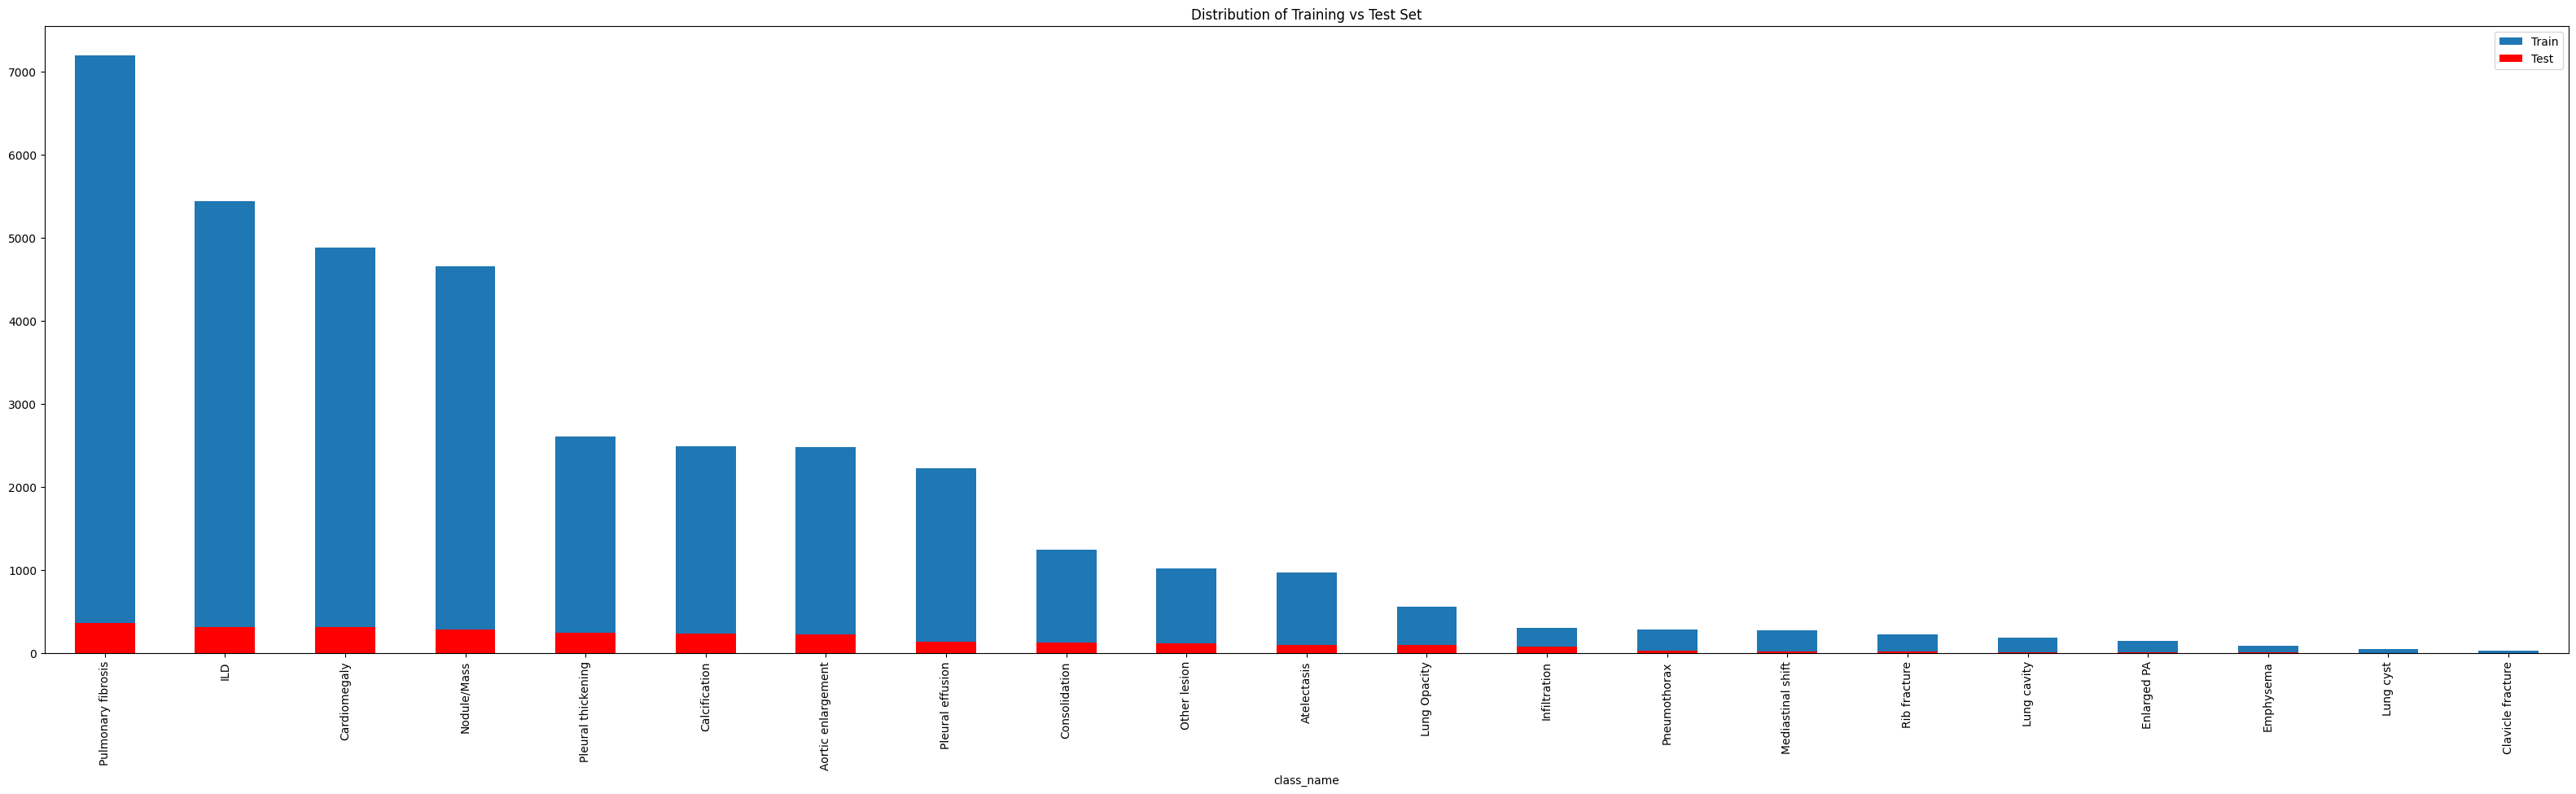

In [7]:
#distribution of observations
annoTrain["class_name"].value_counts().plot(kind = "bar",figsize = (40,10), label = "Train")

annoTest["class_name"].value_counts().plot(kind = "bar", figsize = (40,10), label = "Test", color = "red")

plt.title("Distribution of Training vs Test Set")

plt.legend(loc = "upper right")

In [8]:
print(annoTrain["class_name"].value_counts())

print(annoTest["class_name"].value_counts())

class_name
Aortic enlargement    7193
Cardiomegaly          5443
Pleural thickening    4884
Pulmonary fibrosis    4659
Nodule/Mass           2611
Lung Opacity          2493
Pleural effusion      2483
Other lesion          2227
Infiltration          1247
ILD                   1015
Calcification          967
Consolidation          556
Rib fracture           300
Atelectasis            280
Mediastinal shift      270
Pneumothorax           226
Enlarged PA            188
Emphysema              141
Lung cavity             91
Lung cyst               43
Clavicle fracture       30
Edema                   19
Name: count, dtype: int64
class_name
Pulmonary fibrosis    358
ILD                   316
Cardiomegaly          310
Nodule/Mass           286
Pleural thickening    240
Calcification         232
Aortic enlargement    221
Pleural effusion      136
Consolidation         126
Other lesion          112
Atelectasis            96
Lung Opacity           95
Infiltration           79
Pneumothorax        

In [14]:
#number of unique images that have something wrong with them is 4522 in train dataset
annoTrain.loc[annoTrain["class_name"]!= "No finding"].nunique()

#number of unique images that have something wrong with them is 949 in train dataset
annoTest.loc[annoTest["class_name"]!= "No finding"].nunique()

image_id       949
class_name      21
x_min         2693
y_min         2688
x_max         2689
y_max         2688
dtype: int64

In [4]:
convertedTrain = pd.read_csv("C:/Users/engli/Documents/Y2S1/NSPC2001/Mini_VinDr_CXR_Dataset/FULL_1024_PAD_annotations/anno_train.csv")
convertedTest = pd.read_csv("C:/Users/engli/Documents/Y2S1/NSPC2001/Mini_VinDr_CXR_Dataset/FULL_1024_PAD_annotations/anno_test.csv")

combinedDf = pd.concat((convertedTrain, convertedTest))

conditionList = (combinedDf["class_name"].unique())
print(conditionList)

heartCond = ["Cardiomegaly", "Enlarged PA"]
aortaCond = ["Aortic enlargement"]
anywhereCond = ["Calcification", "Other lesion"]
fractureCond = ["Clavicle fracture", "Rib fracture"]
mediastinalCond = ["Mediastinal shift"]
lungCond = [x for x in conditionList if x not in (heartCond + aortaCond + anywhereCond + fractureCond + mediastinalCond + ["No finding"])]

['Infiltration' 'Lung Opacity' 'Consolidation' 'Nodule/Mass'
 'Pulmonary fibrosis' 'Pleural thickening' 'Aortic enlargement'
 'Cardiomegaly' 'ILD' 'Other lesion' 'Pleural effusion' 'Calcification'
 'Enlarged PA' 'Lung cavity' 'Atelectasis' 'Mediastinal shift' 'Lung cyst'
 'Pneumothorax' 'Emphysema' 'Clavicle fracture' 'Rib fracture' 'Edema']


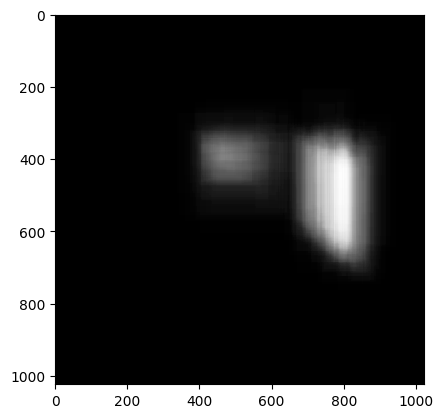

In [19]:
#https://stackoverflow.com/questions/51341091/temperature-is-black-after-thresholding
def makeHeatmap(dimensions, conditions, pandasdf):

    subset = pandasdf[pandasdf["class_name"].isin(conditions)]
    heatmap = np.zeros(dimensions, dtype = float)

    for row in subset.itertuples(index = False):
        heatmap[int(row.x_min):int(row.y_min), int(row.x_max):int(row.y_max)] += 1
    
    plt.imshow(heatmap, cmap = "Greys_r",interpolation="nearest")
    plt.show()
    
makeHeatmap((1024, 1024), heartCond, combinedDf)

<function matplotlib.pyplot.show(close=None, block=None)>

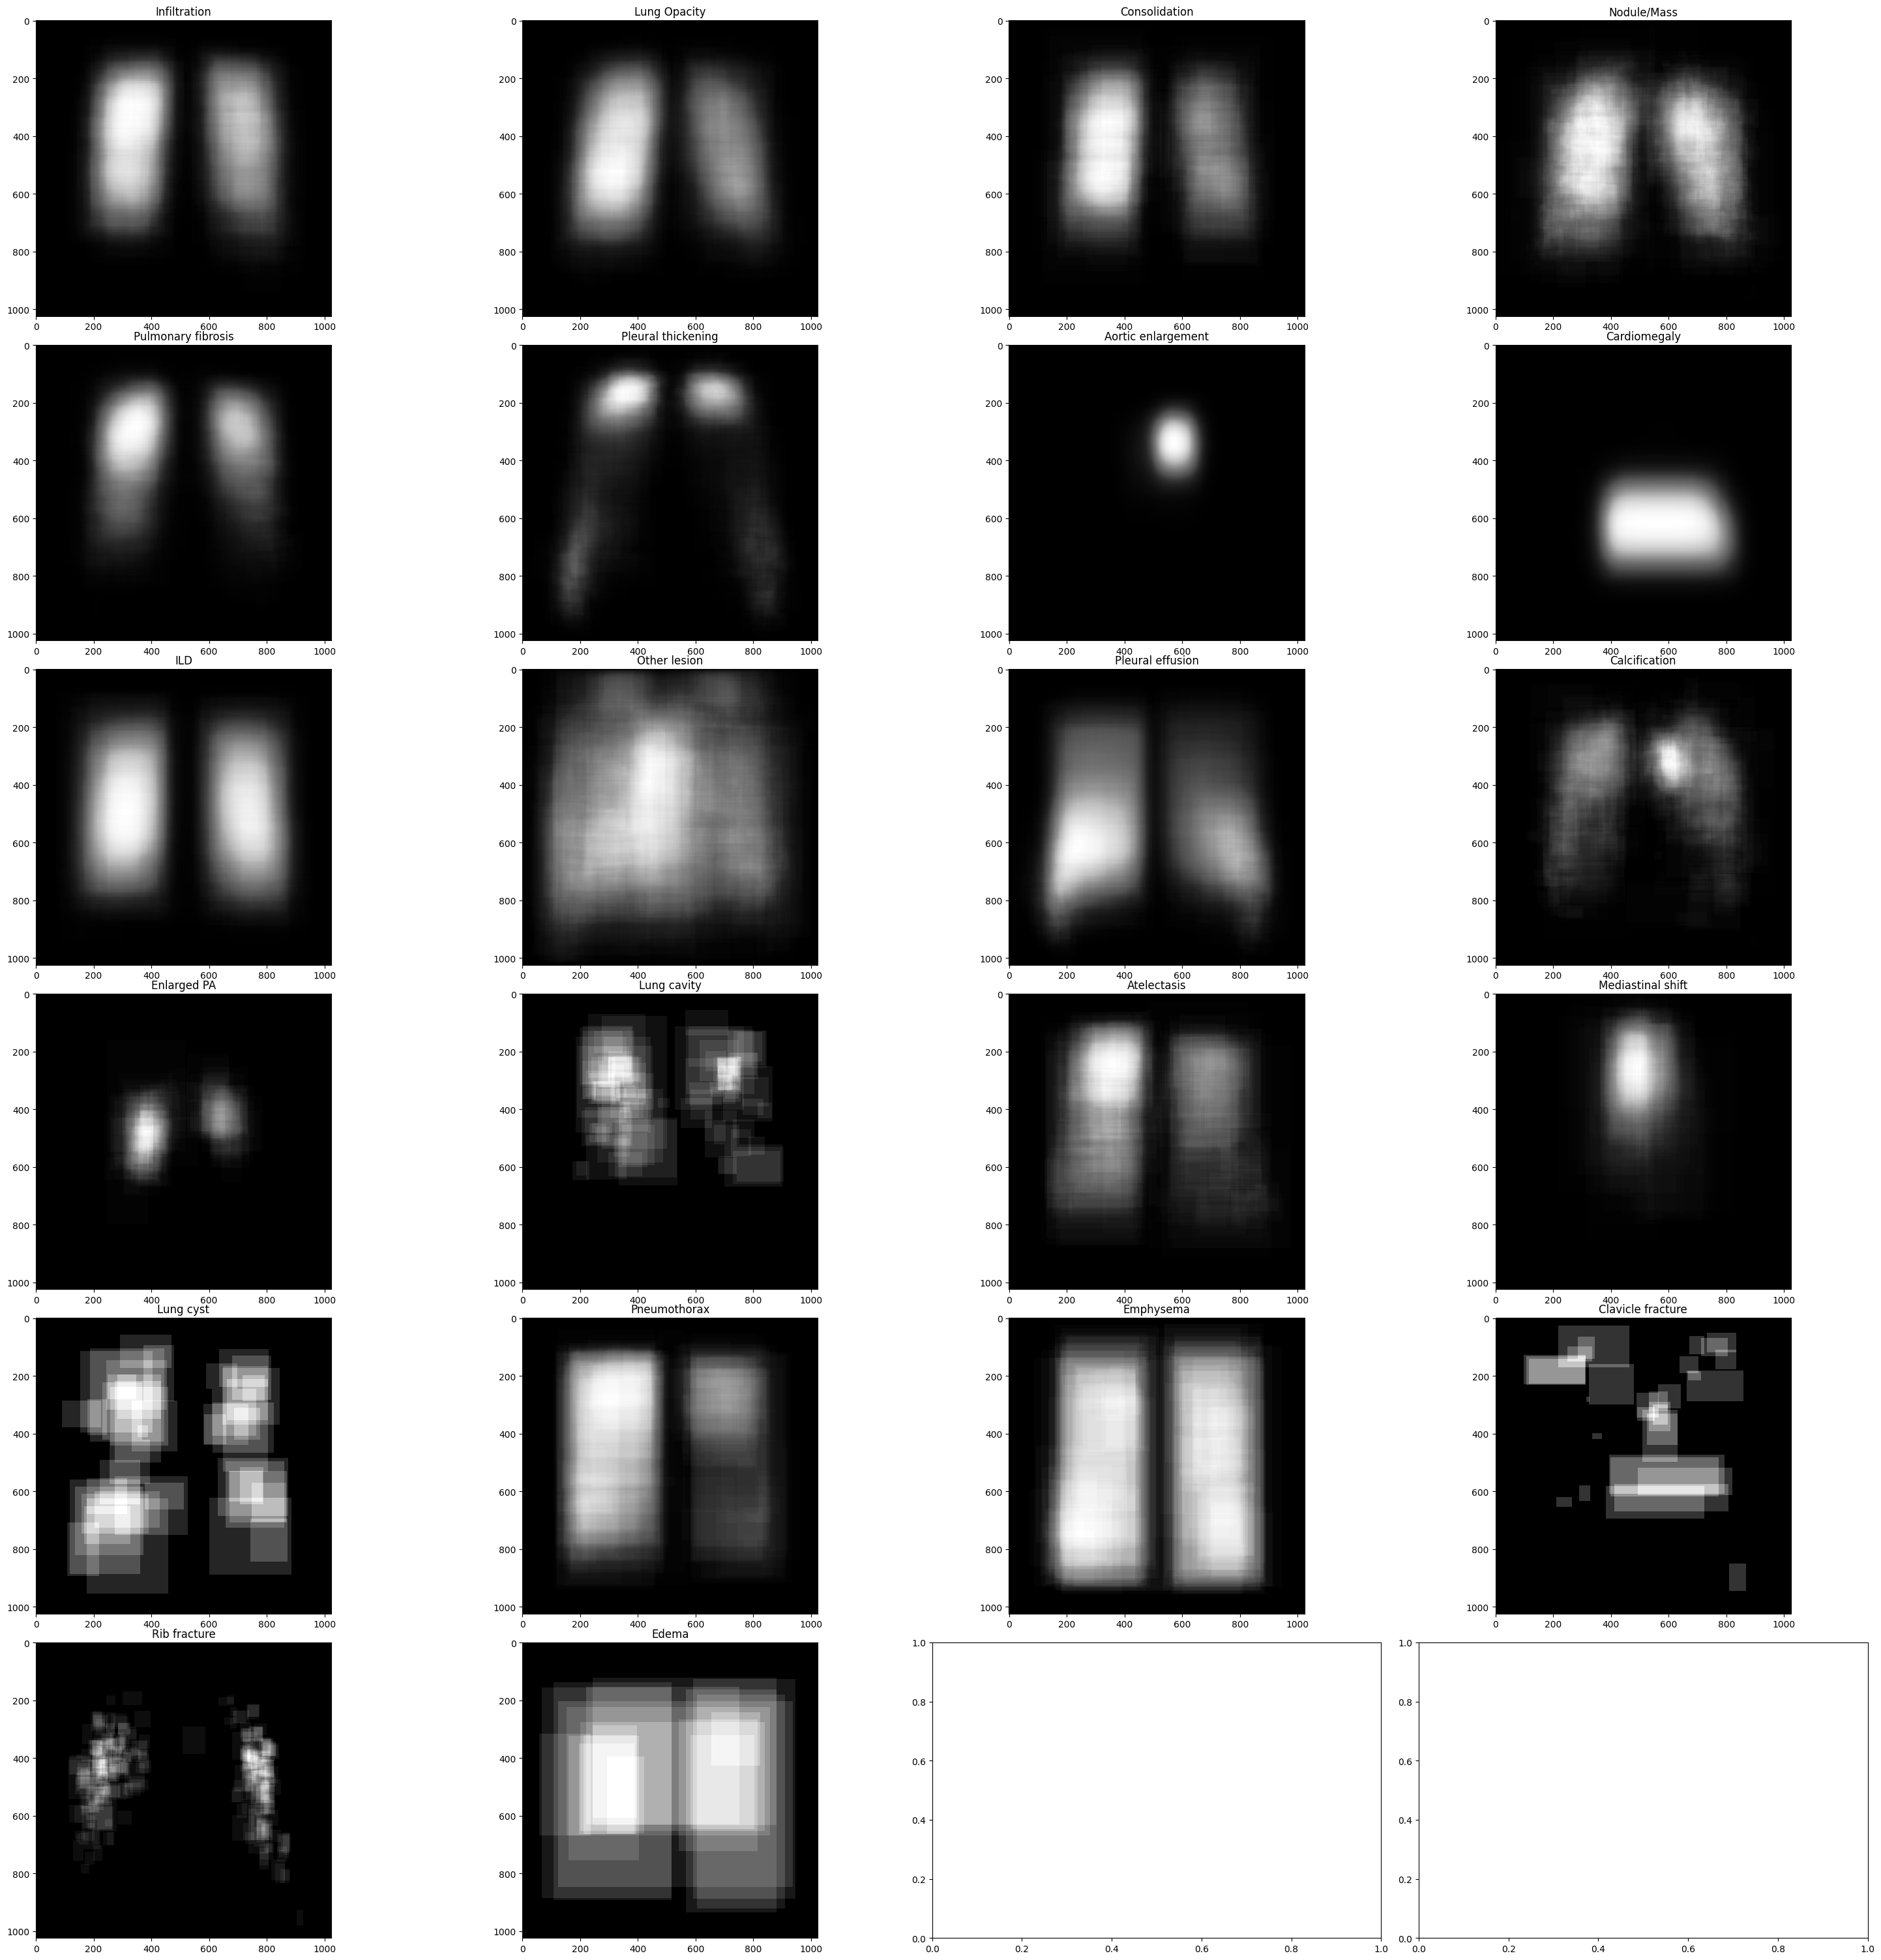

In [20]:
#https://stackoverflow.com/questions/51341091/temperature-is-black-after-thresholding

fig, ax = plt.subplots(nrows = 6, ncols = 4, figsize = (30,30))
#plt.subplots_adjust(hspace=0.5)
fig.tight_layout()

conditionList = [x for x in conditionList if x != "No finding"]

for condition, ax in zip(conditionList, ax.ravel()):
    subset = combinedDf[combinedDf["class_name"] == condition]
    heatmap = np.zeros((1024, 1024), dtype = float)

    for row in subset.itertuples(index = False):
        heatmap[int(row.y_min):int(row.y_max), int(row.x_min):int(row.x_max)] += 1
    heatmap = (heatmap-np.min(heatmap))/(np.max(heatmap)-np.min(heatmap))
    
    ax.imshow(heatmap, cmap = "Greys_r",interpolation="nearest")
    ax.set_title(condition)
    
plt.show

It looks like there may be some issues with clavicle fracture

In [23]:
print(combinedDf.loc[combinedDf["class_name"] == "Clavicle fracture"])

       Unnamed: 0                          image_id rad_id         class_name  \
1013         1013  0391d2388a2442f14d055d5089a747c6    R10  Clavicle fracture   
7003         7003  1aaa4b217affae30113bd3a7a384a4c7    R10  Clavicle fracture   
7714         7714  1d37efa5bcce26d6cc9a224f99db3f0e    R10  Clavicle fracture   
9025         9025  2271647c6cb51cd088392c184f8be135    R10  Clavicle fracture   
9834         9834  258b0025af766aa2a485e3221da4b46e    R10  Clavicle fracture   
10154       10154  268ed28c6d57f5d5383cd5cf8e62e457    R10  Clavicle fracture   
12498       12498  2f35a721ceb1f89cbbd33ade57b32f4e     R9  Clavicle fracture   
15013       15013  37969967243726a9e231291224502076    R10  Clavicle fracture   
15386       15386  38e8d0a7c6e90bb221619d0d8836b3a8     R9  Clavicle fracture   
20259       20259  4bd2c3d9e7b1e62d3b55d858b5dca1a0    R10  Clavicle fracture   
28426       28426  6a245106cf0448251656a6a0bd6aebd5     R8  Clavicle fracture   
31173       31173  742d73529

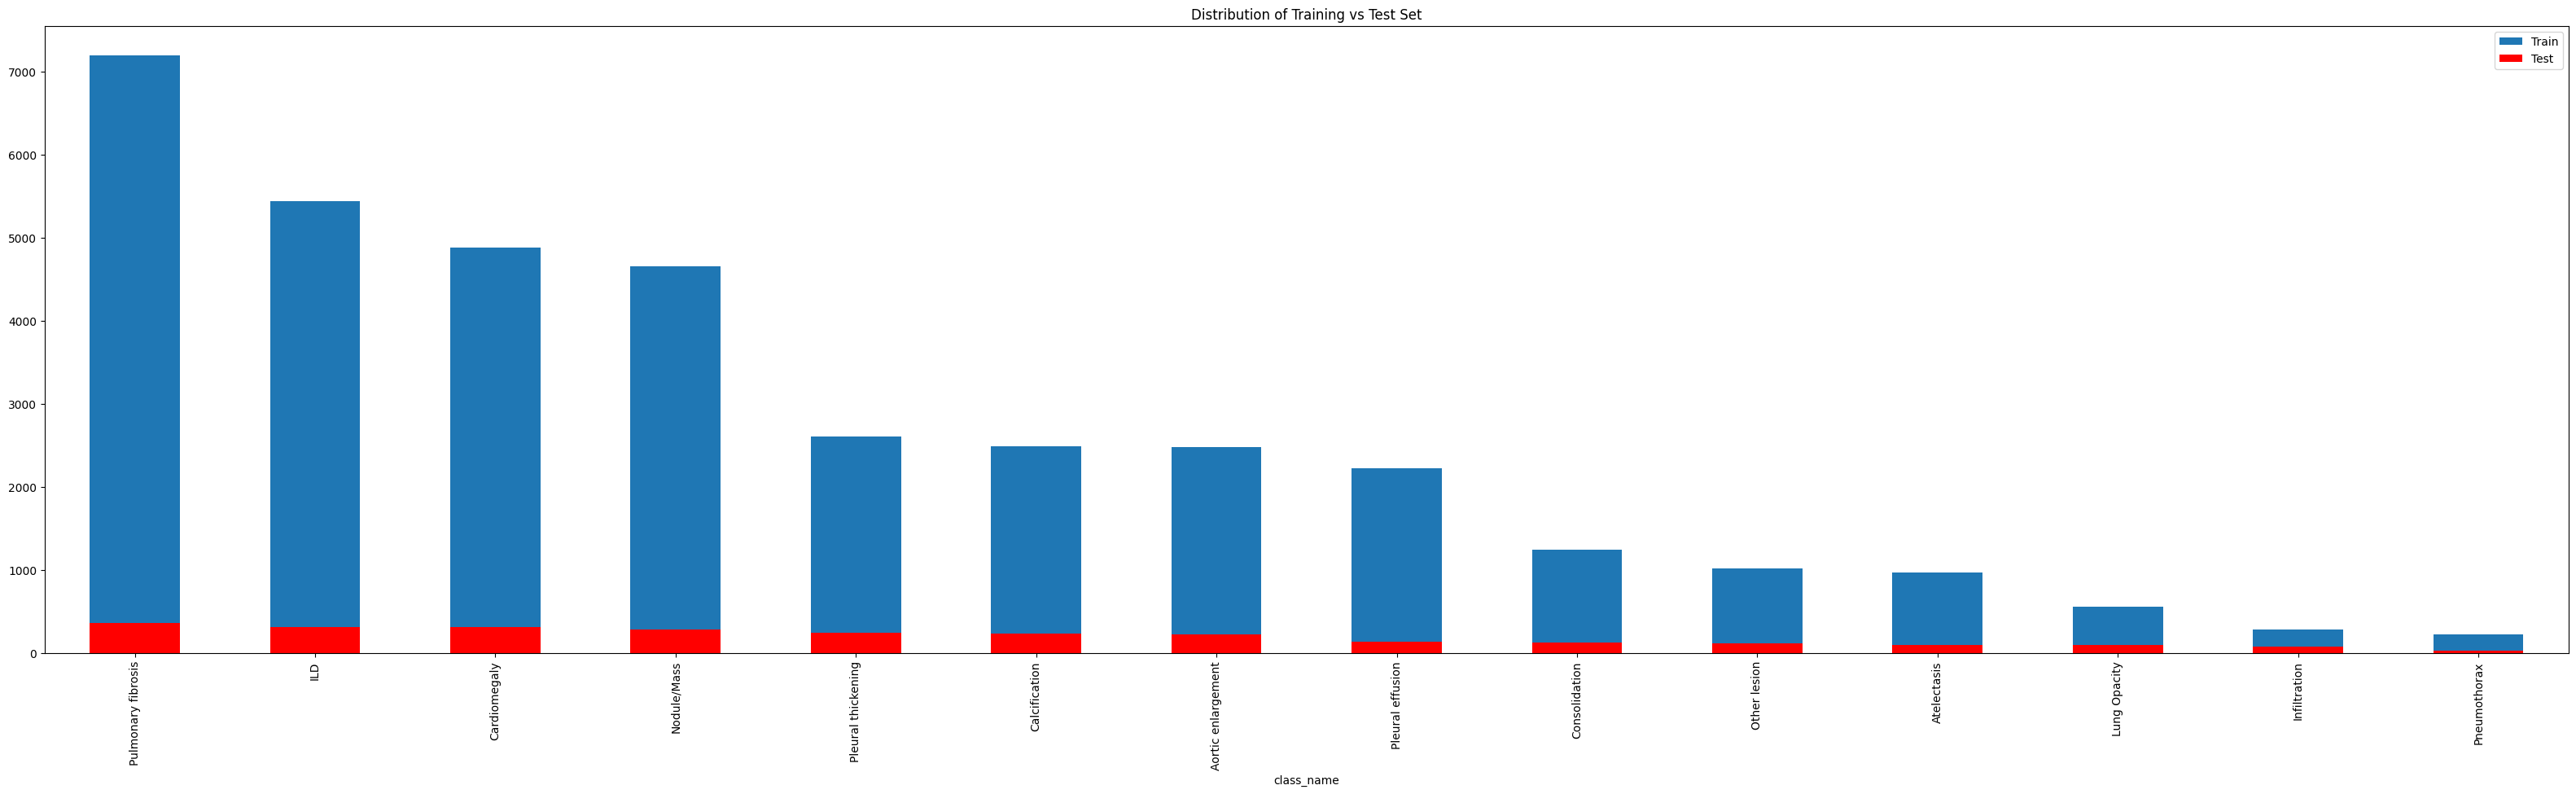

In [12]:
#checking kaggleTest and kaggleTrain annotations

try:
    annoTest = pd.read_csv("kaggleTest.csv")
    annoTrain = pd.read_csv("kaggleTrain.csv")
except FileNotFoundError:
    print("File not found, check directory")
    
#distribution of observations
annoTrain["class_name"].value_counts().plot(kind = "bar",figsize = (40,10), label = "Train")

annoTest["class_name"].value_counts().plot(kind = "bar", figsize = (40,10), label = "Test", color = "red")

plt.title("Distribution of Training vs Test Set")

plt.legend(loc = "upper right")

In [5]:
#Getting average size of each of the BB's

# Step 2: Calculate the width and height of each bounding box
combinedDf['width'] = combinedDf['x_max'] - combinedDf['x_min']
combinedDf['height'] = combinedDf['y_max'] - combinedDf['y_min']

# Step 3: Calculate the area of each bounding box
combinedDf['area'] = combinedDf['width'] * combinedDf['height']
combinedDf['area'] = combinedDf['area']/(1024*1024)

# Step 4: Group the data by category and calculate the average box size for each category
grouped = combinedDf.groupby('class_name')['area'].agg(['mean', 'median', 'std']).reset_index()

sorted_grouped = grouped.sort_values(by='mean', ascending=False).reset_index(drop=True)

print(sorted_grouped)

            class_name      mean    median       std
0                Edema  0.181989  0.215790  0.130378
1            Emphysema  0.117719  0.071506  0.108941
2         Pneumothorax  0.083930  0.053915  0.073500
3                  ILD  0.070565  0.057469  0.056606
4         Cardiomegaly  0.056186  0.051385  0.024365
5         Infiltration  0.039524  0.029511  0.035210
6          Atelectasis  0.038574  0.022693  0.045264
7        Consolidation  0.036244  0.024425  0.033966
8    Mediastinal shift  0.034426  0.025288  0.029990
9     Pleural effusion  0.033604  0.008094  0.051679
10        Other lesion  0.030978  0.014501  0.047883
11           Lung cyst  0.029461  0.021258  0.021114
12        Lung Opacity  0.028970  0.017962  0.033744
13  Pulmonary fibrosis  0.017310  0.008948  0.022301
14  Aortic enlargement  0.014637  0.012004  0.010895
15         Lung cavity  0.013741  0.006944  0.017826
16   Clavicle fracture  0.013621  0.006158  0.014343
17         Enlarged PA  0.012401  0.009350  0.

In [33]:
#Getting the number of doubled up instances of Aortic enlargement
 
images = combinedDf.dropna(axis = 0).groupby("image_id")

aeList = []

for id, image in images:
    if len(image.loc[image["class_name"] == "Aortic enlargement"]) > 1:
        aeList.append(id)
        
print(aeList)

['0007d316f756b3fa0baea2ff514ce945', '00150343289f317a0ad5629d5b7d9ef9', '00675cd546313f912cadd4ad54415d69', '009d837e29ba400e03856cf8d6a5b545', '00aca42a24e4ea6066cca2546150c36e', '010018c93ed33ae56ed048ee54867e46', '0108949daa13dc94634a7d650a05c0bb', '010a3dbb67bc37800a041866844861b1', '0114c5cd093c742334d5a5fa14140421', '014e3dd712dc90f61da7ce8747d8c4c0', '015e332b702e4829710941ab7265bd1d', '0162dad8330007f8f0daf43bcf4033f1', '01afcfaabc406f0fe1797cb7fa6616c6', '01b0510a8d3b0860429536653db5eb21', '01c2b9fcb0384c84648ed76c736552a8', '01cbbeab94b4d2bfd5cd8a467fee46a7', '01d6446afde9fbf4332904bc331e9660', '01ee6e560f083255a630c41bba779405', '01fec681f2d698497151a88d6c5205a1', '020717d6ab0b440b37978d9bace9f9b2', '021ed4f8af985c0fc68335abb2cf2ed7', '02617da0a33fe0446a508186417c2646', '02957c14fee52ac6d0617e6d86275a25', '02acf0e7d0932f9c6a06fd4bbe1f5d90', '02cd1d17763c869ff3d4af5e28539456', '02d9d0c89022adc381c23e72add7c389', '02de1ec3340e75fd5e7294a84a0342a1', '02efc4e2e6e71e024fbfecb404